# Parcial Machine Learning

Dariela Castro Polo
200125680

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("whitegrid")

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Classification model: Fraud Detection

## Exploratory Data Analysis

In [3]:
train_identity = pd.read_csv("train_identity.csv")
train_identity.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [41]:
train_identity.shape

(144233, 41)

In [54]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [57]:
train_identity.dtypes

TransactionID      int64
id_01            float64
id_02            float64
id_03            float64
id_04            float64
id_05            float64
id_06            float64
id_07            float64
id_08            float64
id_09            float64
id_10            float64
id_11            float64
id_12             object
id_13            float64
id_14            float64
id_15             object
id_16             object
id_17            float64
id_18            float64
id_19            float64
id_20            float64
id_21            float64
id_22            float64
id_23             object
id_24            float64
id_25            float64
id_26            float64
id_27             object
id_28             object
id_29             object
id_30             object
id_31             object
id_32            float64
id_33             object
id_34             object
id_35             object
id_36             object
id_37             object
id_38             object
DeviceType        object


In [73]:
train_identity.isna().sum()

TransactionID         0
id_01                 0
id_02              3361
id_03             77909
id_04             77909
id_05              7368
id_06              7368
id_07            139078
id_08            139078
id_09             69307
id_10             69307
id_11              3255
id_12                 0
id_13             16913
id_14             64189
id_15              3248
id_16             14893
id_17              4864
id_18             99120
id_19              4915
id_20              4972
id_21            139074
id_22            139064
id_23            139064
id_24            139486
id_25            139101
id_26            139070
id_27            139064
id_28              3255
id_29              3255
id_30             66668
id_31              3951
id_32             66647
id_33             70944
id_34             66428
id_35              3248
id_36              3248
id_37              3248
id_38              3248
DeviceType         3423
DeviceInfo        25567
dtype: int64

In [60]:
# Conteo de nans en porcentaje
(train_identity.isna().sum()/len(train_identity))*100

TransactionID     0.000000
id_01             0.000000
id_02             2.330257
id_03            54.016071
id_04            54.016071
id_05             5.108401
id_06             5.108401
id_07            96.425922
id_08            96.425922
id_09            48.052110
id_10            48.052110
id_11             2.256765
id_12             0.000000
id_13            11.726165
id_14            44.503685
id_15             2.251912
id_16            10.325654
id_17             3.372321
id_18            68.722137
id_19             3.407681
id_20             3.447200
id_21            96.423149
id_22            96.416215
id_23            96.416215
id_24            96.708798
id_25            96.441868
id_26            96.420375
id_27            96.416215
id_28             2.256765
id_29             2.256765
id_30            46.222432
id_31             2.739318
id_32            46.207872
id_33            49.187079
id_34            46.056034
id_35             2.251912
id_36             2.251912
i

In [61]:
# Columnas con porcentajes nan mayores a 80
[print(i,((train_identity[i].isna().sum()/len(train_identity))*100)) for i in train_identity.columns if ((train_identity[i].isna().sum()/len(train_identity))*100) > 80]

id_07 96.42592194574058
id_08 96.42592194574058
id_21 96.42314865530079
id_22 96.41621542920136
id_23 96.41621542920136
id_24 96.70879757059757
id_25 96.44186836576928
id_26 96.42037536486102
id_27 96.41621542920136


[None, None, None, None, None, None, None, None, None]

In [4]:
train_transaction = pd.read_csv("train_transaction.csv")
train_transaction.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
train_transaction.shape

(590540, 394)

In [58]:
train_transaction.dtypes

TransactionID       int64
isFraud             int64
TransactionDT       int64
TransactionAmt    float64
ProductCD          object
                   ...   
V335              float64
V336              float64
V337              float64
V338              float64
V339              float64
Length: 394, dtype: object

In [72]:
train_transaction.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
V335              508189
V336              508189
V337              508189
V338              508189
V339              508189
Length: 394, dtype: int64

In [106]:
train_transaction['P_emaildomain']

0                 NaN
1           gmail.com
2         outlook.com
3           yahoo.com
4           gmail.com
             ...     
590535            NaN
590536      gmail.com
590537      gmail.com
590538        aol.com
590539      gmail.com
Name: P_emaildomain, Length: 590540, dtype: object

In [71]:
# Conteo de nans en porcentaje
(train_transaction.isna().sum()/len(train_transaction))*100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
V335              86.054967
V336              86.054967
V337              86.054967
V338              86.054967
V339              86.054967
Length: 394, dtype: float64

In [63]:
[print(i,((train_transaction[i].isna().sum()/len(train_transaction))*100)) for i in train_transaction.columns if ((train_transaction[i].isna().sum()/len(train_transaction))*100) > 80]

dist2 93.62837403054831
D6 87.60676668811597
D7 93.40992989467267
D8 87.31229044603245
D9 87.31229044603245
D12 89.04104717715988
D13 89.50926270870728
D14 89.46946862193924
V138 86.12371727571374
V139 86.12371727571374
V140 86.12371727571374
V141 86.12371727571374
V142 86.12371727571374
V143 86.12270125647711
V144 86.12270125647711
V145 86.12270125647711
V146 86.12371727571374
V147 86.12371727571374
V148 86.12371727571374
V149 86.12371727571374
V150 86.12270125647711
V151 86.12270125647711
V152 86.12270125647711
V153 86.12371727571374
V154 86.12371727571374
V155 86.12371727571374
V156 86.12371727571374
V157 86.12371727571374
V158 86.12371727571374
V159 86.12270125647711
V160 86.12270125647711
V161 86.12371727571374
V162 86.12371727571374
V163 86.12371727571374
V164 86.12270125647711
V165 86.12270125647711
V166 86.12270125647711
V322 86.05496664070174
V323 86.05496664070174
V324 86.05496664070174
V325 86.05496664070174
V326 86.05496664070174
V327 86.05496664070174
V328 86.0549666407017

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [5]:
# Hacemos un merge inner para tener la info en comun de los dos dataset
train_full = pd.merge(train_transaction, train_identity, on = 'TransactionID', how='left')

In [6]:
train_full.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [159]:
train_full.shape

(590540, 434)

In [147]:
print(f"""Tamaño del dataset transaction: {train_transaction.shape}.
Tamaño del dataset identity: {train_identity.shape}
Tamaño del dataset despues de merge: {train_full.shape}""")

Tamaño del dataset transaction: (590540, 394).
Tamaño del dataset identity: (144233, 41)
Tamaño del dataset despues de merge: (590540, 434)


Como se hizo un merge left, el tamaño del dataframe queda del de transaction, por ende se llenara de nan values los transaction ID que no aparezcan en identity

In [138]:
train_full.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [160]:
train_full.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             449555
id_37             449555
id_38             449555
DeviceType        449730
DeviceInfo        471874
Length: 434, dtype: int64

In [161]:
(train_full.isna().sum()/len(train_full))*100

TransactionID      0.000000
isFraud            0.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
                    ...    
id_36             76.126088
id_37             76.126088
id_38             76.126088
DeviceType        76.155722
DeviceInfo        79.905510
Length: 434, dtype: float64

In [162]:
cols_nan = [i for i in train_full.columns if train_full[i].isna().sum() > 0]
cols_nan

['card2',
 'card3',
 'card4',
 'card5',
 'card6',
 'addr1',
 'addr2',
 'dist1',
 'dist2',
 'P_emaildomain',
 'R_emaildomain',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D10',
 'D11',
 'D12',
 'D13',
 'D14',
 'D15',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89

In [7]:
colsnan_bigg = [i for i in train_full.columns if ((train_full[i].isna().sum()/len(train_full))*100) > 70]
colsnan_bigg

['dist2',
 'R_emaildomain',
 'D6',
 'D7',
 'D8',
 'D9',
 'D12',
 'D13',
 'D14',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',
 'V221',
 'V222',
 'V223',
 'V224',
 'V225',
 'V226',
 'V227',
 'V228',
 'V229',
 'V230',
 'V231',
 'V232',
 'V233',
 'V234',
 'V235',
 'V236',
 'V237',
 'V238',
 'V239',
 '

In [171]:
print(f"Hay {len(colsnan_bigg)} columnas con valores de nan mayor al 70%, estas se eliminaran del dataset y luego se hara un dropnan de todas las filas")

Hay 208 columnas con valores de nan mayor al 70%, estas se eliminaran del dataset y luego se hara un dropnan de todas las filas


In [8]:
# Quitar columnas con valores de nan mayor al 75%
old_shape = train_full.shape
train_full_post = train_full.drop(colsnan_bigg, axis=1)
new_shape = train_full_post.shape

print(f"Old shape: {old_shape}, New shape: {new_shape}")

Old shape: (590540, 434), New shape: (590540, 226)


In [9]:
# Quitar filas con nan
old_shape = train_full_post.shape
train_full_post = train_full_post.dropna()
new_shape = train_full_post.shape

print(f"Old shape: {old_shape}, New shape: {new_shape}")

Old shape: (590540, 226), New shape: (40737, 226)


In [185]:
print(f"""El tamaño se reduce en un {((old_shape[0] - new_shape[0])/old_shape[0])*100}%, 
pero esto se da porque al hacer un merge left muchas columnas de identity quedaban vacias 
porque habian IDs en transaccion que no tenian identity, realmente la reduccion fue de {((train_identity.shape[0] - new_shape[0])/train_identity.shape[0])*100}%""")

El tamaño se reduce en un 93.10173739289463%, 
pero esto se da porque al hacer un merge left muchas columnas de identity quedaban vacias 
porque habian IDs en transaccion que no tenian identity, realmente la reduccion fue de 71.75611683872623%


In [175]:
train_full_post.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=226)

In [177]:
train_full_post.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
97,2987097,0,88147,21.5,W,2581,199.0,150.0,mastercard,202.0,...,0.0,59.0,59.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0
181,2987181,0,89437,171.0,W,16632,215.0,150.0,mastercard,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200,2987200,0,89666,34.0,W,12577,268.0,150.0,visa,166.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
218,2987218,0,89930,117.0,W,12469,360.0,150.0,mastercard,166.0,...,215.0,215.0,215.0,215.0,321.0,321.0,321.0,0.0,0.0,0.0
285,2987285,0,90892,34.0,W,10520,543.0,150.0,mastercard,224.0,...,34.0,34.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0


In [197]:
px.bar(train_full_post.groupby("isFraud", as_index=False)['TransactionID'].count(), x="isFraud", y="TransactionID")

In [222]:
# Variables a la que se le hara el EDA
vars_eda = ['card4', 'card6', 'TransactionDT', 'TransactionAmt', 'P_emaildomain']

In [223]:
train_full_post[vars_eda+['isFraud']].head(5)

,card4,card6,TransactionDT,TransactionAmt,P_emaildomain,isFraud
97,mastercard,debit,88147,21.5,gmail.com,0
181,mastercard,debit,89437,171.0,gmail.com,0
200,visa,debit,89666,34.0,gmail.com,0
218,mastercard,debit,89930,117.0,gmail.com,0
285,mastercard,debit,90892,34.0,gmail.com,0


In [225]:
px.bar(train_full_post.groupby(["isFraud", "card6"], as_index=False).size().sort_values(by='size', ascending=False),\
        x="isFraud", y="size", color="card6", title="Fraud by card type")

In [224]:
px.bar(train_full_post.groupby(["isFraud", "P_emaildomain"], as_index=False).size().sort_values(by='size', ascending=False),\
        x="isFraud", y="size", color="P_emaildomain", title="Fraud by card type")

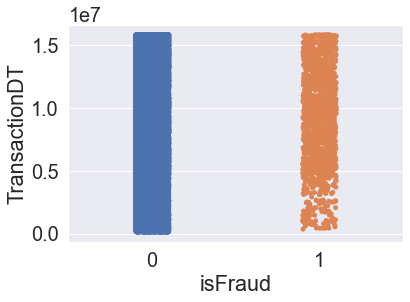

In [227]:
sns.stripplot(x="isFraud", y="TransactionDT", data=train_full_post, jitter=True, edgecolor="gray");

In [228]:
px.box(train_full_post, x="isFraud", y="TransactionDT")

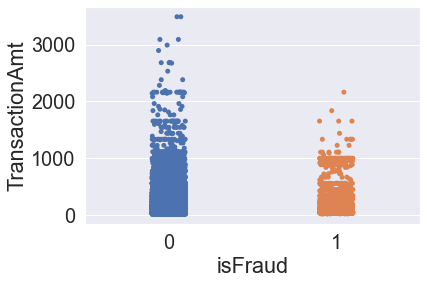

In [231]:
sns.stripplot(x="isFraud", y="TransactionAmt", data=train_full_post, jitter=True, edgecolor="gray");

In [229]:
px.box(train_full_post, x="isFraud", y="TransactionAmt")

### Multicolinealidad

In [10]:
def transform_cat_columns(df, cols_obj):
    
    encoder = OneHotEncoder(sparse=False, categories='auto', drop='first')
    encoded_data = encoder.fit_transform(df[cols_obj])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_obj))
    final_df = pd.concat([df, encoded_df], axis=1)
    final_df = final_df.drop(cols_obj, axis=1)
    
    return final_df

In [11]:
def apply_vif(df_test, var_names, cols_ignore):
    
    for var in var_names:
        
        if not (var in cols_ignore):
        
            new_var_names = df_test.columns
            
            if var in df_test.columns:

                y = df_test[var]
                X = df_test[df_test.columns].drop(columns=[var])
                
                r_squared = np.linalg.lstsq(X, y, rcond=None)[0]
                vif = 1.0 / (1.0 - r_squared)
                
                cols_drop = list(pd.DataFrame(vif, columns=['vif']).sort_values(by='vif', ascending=False).query("vif >= 5").reset_index()['index'])
                
                if len(cols_drop) >  0:
                    cols_drop_df = list(new_var_names[cols_drop])
                    print(f"{var}, Columnas a eliminar: {cols_drop_df}")
                    df_test = df_test.drop(cols_drop_df, axis=1)
                
    return df_test
    

In [12]:
df_vif = train_full_post.copy()
not_cols_obj = [i for i in df_vif.columns if not(df_vif[i].dtypes == 'object')]
cols_obj = [i for i in df_vif.columns if df_vif[i].dtypes == 'object']
df_vif = df_vif[not_cols_obj]

In [13]:
df_vif.shape

(40737, 213)

In [14]:
df_vif_post = apply_vif(df_vif, df_vif.columns, ['TransactionID', 'isFraud'])

card1, Columnas a eliminar: ['D3']
card5, Columnas a eliminar: ['V29', 'V309', 'V319', 'V316']
addr1, Columnas a eliminar: ['V10']
C2, Columnas a eliminar: ['V55', 'V43', 'C10']
C5, Columnas a eliminar: ['V37', 'V90', 'V48', 'V110']
C6, Columnas a eliminar: ['V68']
C9, Columnas a eliminar: ['V45']
C13, Columnas a eliminar: ['V42', 'V85', 'C6', 'V11']
C14, Columnas a eliminar: ['C1']
D1, Columnas a eliminar: ['V295', 'D1']
D2, Columnas a eliminar: ['V115', 'V291', 'C2', 'V307', 'V75']
D4, Columnas a eliminar: ['C14', 'V289']
D5, Columnas a eliminar: ['V288', 'V1']
D10, Columnas a eliminar: ['V126']
D11, Columnas a eliminar: ['C13', 'V282']
V3, Columnas a eliminar: ['V2']
V5, Columnas a eliminar: ['V4']
V7, Columnas a eliminar: ['V6']
V20, Columnas a eliminar: ['V19']
V24, Columnas a eliminar: ['V23']
V47, Columnas a eliminar: ['V46']
V52, Columnas a eliminar: ['V51']
V54, Columnas a eliminar: ['V53']
V62, Columnas a eliminar: ['V61']
V69, Columnas a eliminar: ['V69']
V74, Columnas a eli

In [431]:
df_vif_post.shape

(40737, 119)

In [15]:
df_vif_full = pd.merge(df_vif_post, train_full_post[cols_obj+["TransactionID"]], on = "TransactionID", how='inner')

In [16]:
df_vif_full.shape

(40737, 132)

## Model design

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

In [18]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

In [17]:
def transform_cat_columns(df, cols_obj):
    
    encoder = OneHotEncoder(sparse=False, categories='auto', drop='first')
    encoded_data = encoder.fit_transform(df[cols_obj])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cols_obj))
    final_df = pd.concat([df_vif_full, encoded_df], axis=1)
    final_df = final_df.drop(cols_obj, axis=1)
    
    return final_df

In [19]:
df_cod = transform_cat_columns(df_vif_full.copy(), cols_obj)

c:\Users\coold\miniconda3\envs\ml_venv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Reducir la cantidad de filas, para disminuir el costo computacional

In [24]:
class1 = df_cod.query("isFraud == 1").reset_index(drop=True)
class0 = df_cod.query("isFraud == 0").sample(10000).reset_index(drop=True)

indices_class1 = np.random.permutation(class1.index)
indices_class0 = np.random.permutation(class0.index)

class1 = class1.iloc[indices_class1]
class0 = class0.iloc[indices_class0]

df_sample = pd.concat([class1, class0], ignore_index=True)

In [25]:
df_sample.shape

(11594, 172)

In [26]:
X = df_cod.drop(["TransactionID", "isFraud"], axis=1)
y = df_cod["isFraud"]

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=True)

In [39]:
# Add k-Neighbours, Ridge, Lasso models to the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('regressor', [Ridge(), neighbors.KNeighborsRegressor()])])
# Add k-Neightbourd, Ridge, Lasso parameters to the pipeline
param_grid = [{'regressor': [Ridge()],
               'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'regressor': [Lasso()],
               'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'regressor': [neighbors.KNeighborsRegressor()],
               'regressor__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}]
# Add GridSearchCV to the pipeline
grid = GridSearchCV(pipe, param_grid, cv=5, n_jobs=-1)

pipe = make_pipeline(StandardScaler(), Ridge())
pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [40]:
pipe = make_pipeline(StandardScaler(), Ridge())
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
pipe

Pipeline(steps=[('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
pipe = make_pipeline(StandardScaler(), neighbors.KNeighborsRegressor())
param_grid = {'kneighborsregressor__n_neighbors': [1, 2, 3]}


In [41]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=StratifiedKFold(n_splits=4), n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=4, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [37]:
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'ridge__alpha': 100}


In [46]:
grid.cv_results_['mean_test_score']

array([0.11882496, 0.11882508, 0.11882632, 0.11883822, 0.11892418,
       0.11905753])

In [44]:
precision = precision_score(y_test, grid.predict(X_test))

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [38]:
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.09


In [ ]:
print("f1_score of random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

In [24]:
plt.matshow(grid.cv_results_['mean_test_score'].reshape(3, -1), vmin=0, cmap="viridis")
plt.xlabel("ridge__alpha")
plt.ylabel("polynomialfeatures__degree")
plt.xticks(range(len(param_grid['ridge__alpha'])), param_grid['ridge__alpha'])
plt.yticks(range(len(param_grid['polynomialfeatures__degree'])),
param_grid['polynomialfeatures__degree'])
plt.colorbar();

ValueError: cannot reshape array of size 1 into shape (3,newaxis)

# Regression model: Wind speed

## Exploratory Data Analysis

In [8]:
traino_dv = pd.read_csv("data_treino_dv_df_2000_2010.csv")
traino_dv.head(5)

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,12:00,0.809017,1.8,69.0,60.0,22.6,20.7,61.0,888.2,0.0,3.8,888.2,887.7
1,13:00,0.965926,2.7,62.0,55.0,24.2,22.5,55.0,888.4,0.0,4.7,888.4,888.2
2,14:00,0.891007,2.0,56.0,50.0,25.5,24.3,51.0,888.1,0.0,4.9,888.4,888.1
3,15:00,0.848048,2.5,52.0,44.0,27.4,25.0,44.0,887.4,0.0,5.8,888.1,887.4
4,16:00,0.224951,2.4,50.0,43.0,27.1,25.5,46.0,886.5,0.0,5.8,887.4,886.5


In [9]:
teste_dv = pd.read_csv("data_teste_dv_df_2011.csv")
teste_dv.head(5)

,HORA (UTC),"VENTO, DIREï¿½ï¿½O HORARIA (gr) (ï¿½ (gr))","VENTO, VELOCIDADE HORARIA (m/s)",UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),TEMPERATURA Mï¿½XIMA NA HORA ANT. (AUT) (ï¿½C),TEMPERATURA Mï¿½NIMA NA HORA ANT. (AUT) (ï¿½C),"UMIDADE RELATIVA DO AR, HORARIA (%)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)","PRECIPITAï¿½ï¿½O TOTAL, HORï¿½RIO (mm)","VENTO, RAJADA MAXIMA (m/s)",PRESSï¿½O ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSï¿½O ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)
0,00:00,-0.309017,3.4,95.0,94.0,19.4,19.2,95.0,881.8,0.0,5.8,881.8,881.0
1,01:00,-0.438371,2.2,95.0,93.0,19.3,19.2,93.0,882.4,0.0,5.6,882.4,881.7
2,02:00,-0.224951,3.0,95.0,93.0,19.3,19.1,95.0,882.7,0.0,5.6,882.7,882.4
3,03:00,-0.766044,3.7,97.0,95.0,19.1,18.1,96.0,882.6,6.0,7.9,882.9,882.6
4,04:00,-0.422618,2.4,97.0,96.0,18.2,17.7,96.0,882.0,3.0,6.7,882.6,882.0


## Model design